#  Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.




## Importing Initial Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## DataLoading and Preprocessing 

In [2]:
dataset = pd.read_csv(r"F:\IIITBangloreAIML\17. Kaggle Competition\datasets\train.csv")

In [3]:
dataset.shape

(69999, 172)

In [4]:
## Checking the First 5 Rows 
dataset.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
## checking the dtypes of all the columns
dataset.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

#### Most columns are of Integer and float type and few columns are of object type 

## Dealing With Missing Values 

In [6]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]  

In [7]:
missing_values

loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_7          399
last_date_of_month_8          733
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6  

In [8]:
## checking the percentage of missing values 
missing_percentage = (missing_values / len(dataset)) * 100
missing_percentage

loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_m

In [9]:
## Dropping Columns having more than 50% Null values
threshold = 50
missing_cols_greater_than_threshold = missing_percentage[missing_percentage>threshold].index.tolist()
print(f"Columns with more than 50% missing values are {missing_cols_greater_than_threshold} , length of columns : {len(missing_cols_greater_than_threshold)}")

Columns with more than 50% missing values are ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'] , length of columns : 30


#### We can straight away delete these columns because imputation of these many null values could affect the model perormance drastically

In [10]:
dataset.drop(columns = missing_cols_greater_than_threshold,inplace=True,axis=1)


In [11]:
dataset.shape

(69999, 142)

#### Now we are left with 142 columns 

In [12]:
## checking object type columns
object_type_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(f"Object Type Columns are {object_type_columns}")

Object Type Columns are ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [13]:
## checking null value count in object type columns
for col in object_type_columns:
    print(f" column : {col} , Null Count is : {dataset[col].isnull().sum()}")

 column : last_date_of_month_6 , Null Count is : 0
 column : last_date_of_month_7 , Null Count is : 399
 column : last_date_of_month_8 , Null Count is : 733
 column : date_of_last_rech_6 , Null Count is : 1101
 column : date_of_last_rech_7 , Null Count is : 1234
 column : date_of_last_rech_8 , Null Count is : 2461


In [14]:
## Checking the Unique Count for each categorical variable
for col in object_type_columns:
    print(f" column : {col} , Unique Category Count is : {dataset[col].nunique()} , Unique Values are : {dataset[col].unique()} ")

 column : last_date_of_month_6 , Unique Category Count is : 1 , Unique Values are : ['6/30/2014'] 
 column : last_date_of_month_7 , Unique Category Count is : 1 , Unique Values are : ['7/31/2014' nan] 
 column : last_date_of_month_8 , Unique Category Count is : 1 , Unique Values are : ['8/31/2014' nan] 
 column : date_of_last_rech_6 , Unique Category Count is : 30 , Unique Values are : ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014'] 
 column : date_of_last_rech_7 , Unique Category Count is : 31 , Unique Values are : ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7

#### last_date_of_month_7 , last_date_of_month_8  have only one Unique Value so we can directly impute the nulls with that unique value

In [15]:
dataset['last_date_of_month_7'].fillna('7/31/2014', inplace=True)
dataset['last_date_of_month_8'].fillna('8/31/2014', inplace=True)

In [16]:
object_cols_with_nulls = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [17]:
dataset.shape

(69999, 142)

In [18]:
## Dropping the rows where all the three columns are nulls simultaneously

dataset = dataset.dropna(subset=object_cols_with_nulls,how='all')
dataset.reset_index(drop=True, inplace=True)

In [19]:
dataset.shape

(69934, 142)

#### hence 65 records were having all three columns as nulls 

## Dropping Rows where more than 50 percents of columns are null

In [20]:
# setting threshold
threshold = dataset.shape[1] // 2 
dataset = dataset.dropna(thresh=threshold)
dataset.reset_index(drop=True, inplace=True)

In [21]:
dataset.shape

(69225, 142)

In [22]:
69934-69225

709

#### 709 Rows had 50 percent of columns as nulls

In [23]:
missing_values = dataset.isnull().sum()

In [24]:
missing_cols = missing_values[missing_values>0].index.tolist()

## For Datatype Object We will impute missing values with Mode 
## For Datatype Numerical We will impute missing values by checking the skewness , if data shows skewness then we will impute it with median  else with mean

In [25]:
for col in missing_cols:
    if dataset[col].dtype == 'object':  # Categorical column
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    else:  # Numerical column
        if abs(dataset[col].skew()) < 0.5:  # Normal distribution (low skewness)
            dataset[col].fillna(dataset[col].mean(), inplace=True)
        else:  # Skewed distribution
            dataset[col].fillna(dataset[col].median(), inplace=True)

# Check if all missing values are handled
print(dataset[missing_cols].isnull().sum())

onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0
std_og_t2c_mou_7       0
std_og_t2c_mou_8       0
std_og_mou_6           0


In [26]:
# Choose a color palette with 15 distinct colors
palette = sns.color_palette("coolwarm", n_colors=15)


In [27]:
import warnings 
warnings.filterwarnings('ignore')

## Univariate Analysis

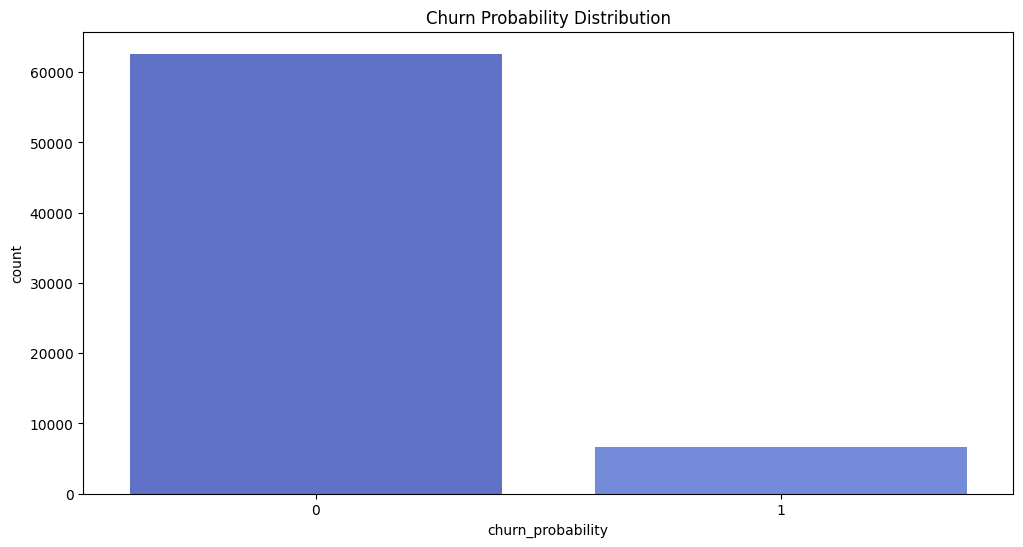

In [28]:
# checking the distribution of churn probability column 
plt.figure(figsize=(12,6))
sns.countplot(data=dataset,x='churn_probability',palette=palette)
plt.title('Churn Probability Distribution')
plt.show()

### The Dataset is Highly Imbalanced hence we will use SMOTE inorder to balance it

## Removing the Columns that have only single unique value since it wont provide any unique information to the model

In [29]:
unique_value_count = dataset.nunique()

In [30]:
unique_value_count[unique_value_count == 1]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

In [31]:
single_unique_value_cols  = unique_value_count[unique_value_count == 1].index.tolist()

In [32]:
print(f"Columns having only single unique values are {single_unique_value_cols}")

Columns having only single unique values are ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [33]:
# dropping these colums
dataset.drop(columns=single_unique_value_cols,inplace=True,axis=1)

In [34]:
dataset.shape

(69225, 129)

## Correcting the datatype of Objects since Model won't be able to work with Object Datatypes

In [35]:
datatypes_of_columns = dataset.dtypes

In [36]:
object_type_cols = datatypes_of_columns[datatypes_of_columns=='object'].index.tolist()

In [37]:
object_type_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [38]:
dataset.loc[:,object_type_cols]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014
...,...,...,...
69220,6/18/2014,7/31/2014,8/31/2014
69221,6/28/2014,7/31/2014,8/27/2014
69222,6/25/2014,7/30/2014,8/29/2014
69223,6/29/2014,7/19/2014,8/26/2014


In [39]:
dataset['date_of_last_rech_6_day'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.day
dataset['date_of_last_rech_7_day'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.day
dataset['date_of_last_rech_8_day'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.day

In [40]:
dataset['date_of_last_rech_6_month'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.month
dataset['date_of_last_rech_7_month'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.month
dataset['date_of_last_rech_8_month'] = pd.to_datetime(dataset['date_of_last_rech_6']).dt.month

### Dropping the original object type columns

In [41]:
dataset.drop(columns = object_type_cols , axis = 1 , inplace=True )

In [42]:
dataset.dtypes == 'object'

id                           False
arpu_6                       False
arpu_7                       False
arpu_8                       False
onnet_mou_6                  False
onnet_mou_7                  False
onnet_mou_8                  False
offnet_mou_6                 False
offnet_mou_7                 False
offnet_mou_8                 False
roam_ic_mou_6                False
roam_ic_mou_7                False
roam_ic_mou_8                False
roam_og_mou_6                False
roam_og_mou_7                False
roam_og_mou_8                False
loc_og_t2t_mou_6             False
loc_og_t2t_mou_7             False
loc_og_t2t_mou_8             False
loc_og_t2m_mou_6             False
loc_og_t2m_mou_7             False
loc_og_t2m_mou_8             False
loc_og_t2f_mou_6             False
loc_og_t2f_mou_7             False
loc_og_t2f_mou_8             False
loc_og_t2c_mou_6             False
loc_og_t2c_mou_7             False
loc_og_t2c_mou_8             False
loc_og_mou_6        

#### Now we dont have any object type columns

## Data Splitting & SMOTE Application 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Assume your dataset is loaded as 'dataset'
df = dataset 

# Separate Features (X) and Target (y)
X = df.drop(columns=['churn_probability'])  
y = df['churn_probability']  

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [45]:
print(f"X_train shape : {X_train.shape} , X_test shape : {X_test.shape}")

X_train shape : (55380, 131) , X_test shape : (13845, 131)


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
#Check the class distribution before and after SMOTE
print("Original Class Distribution:\n", y.value_counts())
print("\nTrain Data Distribution Before SMOTE:\n", y_train.value_counts())
print("\nTrain Data Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Original Class Distribution:
 churn_probability
0    62645
1     6580
Name: count, dtype: int64

Train Data Distribution Before SMOTE:
 churn_probability
0    50116
1     5264
Name: count, dtype: int64

Train Data Distribution After SMOTE:
 churn_probability
0    50116
1    50116
Name: count, dtype: int64


## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Dimensionality Reduction using PCA 

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

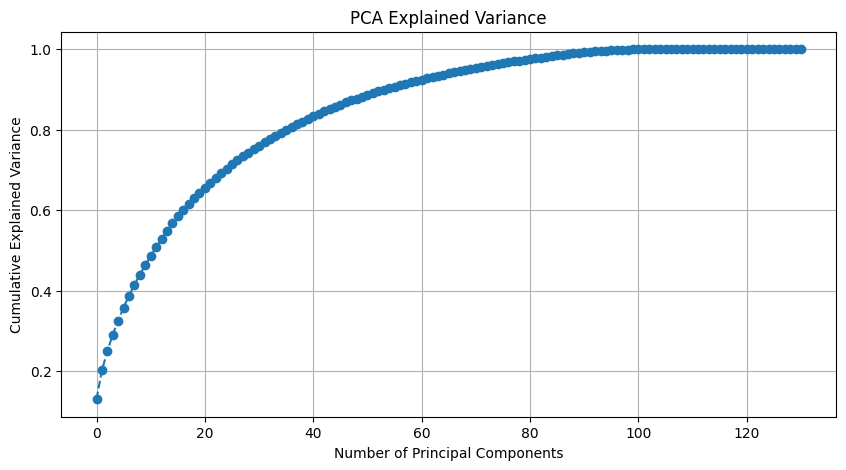

In [53]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

In [54]:
# Apply PCA with 85 components
pca = PCA(n_components=85)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  


In [55]:
# total variance captured

total_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total Variance Captured with 85 Components: {total_variance:.3f}")

Total Variance Captured with 85 Components: 0.983


#### Now we have X_train_pca , X_test_pca , y_train_resampled , y_test

## Model Selection 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Training Logistic Regression...
Training Support Vector Machine...
Training Random Forest...
Training XGBoost...

Model Performance:
                         Accuracy  F1 Score   ROC AUC
Logistic Regression     0.801806  0.434460  0.873489
Support Vector Machine  0.871506  0.523440  0.892098
Random Forest           0.793788  0.404340  0.842968
XGBoost                 0.875479  0.501734  0.878906


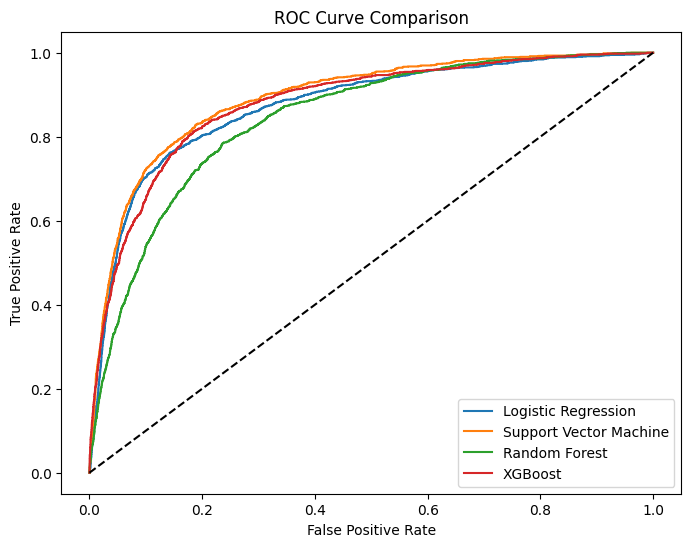

In [57]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=80, max_depth=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_pca, y_train_resampled)
    
    # Predictions
    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1]  # Probability for ROC curve

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {"Accuracy": acc, "F1 Score": f1, "ROC AUC": roc_auc}

# Convert results to DataFrame and print

results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)

# Plot ROC Curve for all models
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## ROC Curve Comparison:

### Support Vector Machine (Orange Curve) seems to have the highest ROC AUC (0.8920), meaning it has the best overall classification ability.
### Logistic Regression and XGBoost have similar AUC values, indicating they perform well but are slightly worse than SVM.
### Random Forest (Green Curve) performs the worst in terms of AUC (0.8417), meaning it struggles more with distinguishing between classes.

## Hyperparameter Tuning On SVM

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define SVM model
svm_model = SVC(probability=True)

# Optimized hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 0.01, 0.1] 
}

# Randomized Search CV 
random_search = RandomizedSearchCV(
    svm_model, param_grid, 
    n_iter=5,  
    cv=3,  
    scoring='roc_auc',  # Optimize for ROC AUC
    n_jobs=-1,  # Use all available CPU cores
    verbose=1, 
    random_state=42
)

# Fit on a subset for faster training
random_search.fit(X_train_pca[:5000], y_train_resampled[:5000])

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Best SVM model
best_svm = random_search.best_estimator_

# Predict probabilities for ROC Curve
y_pred_svm = best_svm.predict(X_test_pca)
y_prob_svm = best_svm.predict_proba(X_test_pca)[:, 1]


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


In [59]:
print("Best SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Best SVM F1 Score:", f1_score(y_test, y_pred_svm))
print("Best SVM ROC AUC:", roc_auc_score(y_test, y_prob_svm))

Best SVM Accuracy: 0.9067533405561574
Best SVM F1 Score: 0.11514736120630568
Best SVM ROC AUC: 0.8554839701982586


### SVM & XGBoost worked well for the above data 